# Metody analizy danych. Lab 8. Biblioteka matplotlib, część 2

## 1. Wykres radarowy

Wykres radarowy (w Internecie można spotkać jeszcze kilka innych określeń: biegunowy, pająkowy, gwiezdny) to wykres, który dość dobrze nadaje się do porównania kilku cech dla niewielkiej liczby obserwacji, zazwyczaj dla dwóch.

> Dokumentacja:
> * https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html
> * biblioteka z przykładami: https://matplotlib.org/stable/gallery/pie_and_polar_charts/index.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt

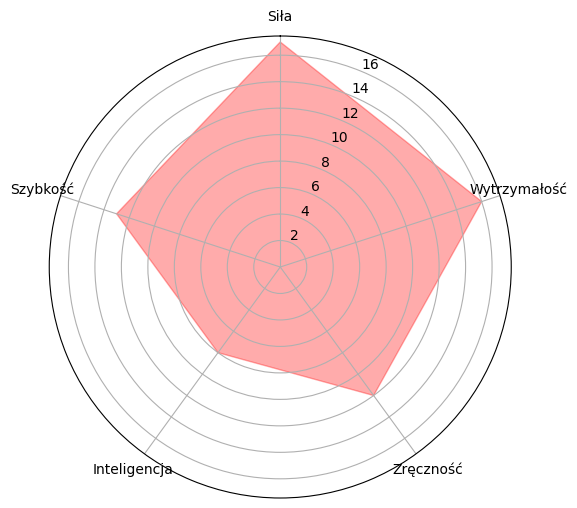

In [10]:
# przykład wykresu radarowego

# dane
etykiety = ['Siła', 'Wytrzymałość', 'Zręczność', 'Inteligencja', 'Szybkość']
dane = [17, 16, 12, 8, 13]

# generowanie ilości osi i ich położenia na wykresie
angles = np.linspace(0, 2 * np.pi, len(etykiety), endpoint=False).tolist()
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# wypełnienie obszarów
ax.fill(angles, dane, color='red', alpha=0.33)
# rysowanie linii na krawędziach obszaru - opcjonalne
# ax.plot(angles, dane, color='red', linewidth=1)

# ustawienie osi, tak aby rozpoczynały się od "godziny 12"
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# zamieniamy etykiety wyrażone jako kąty na nazwy cech ze zmiennej etykiety
ax.set_thetagrids(np.degrees(angles), etykiety);

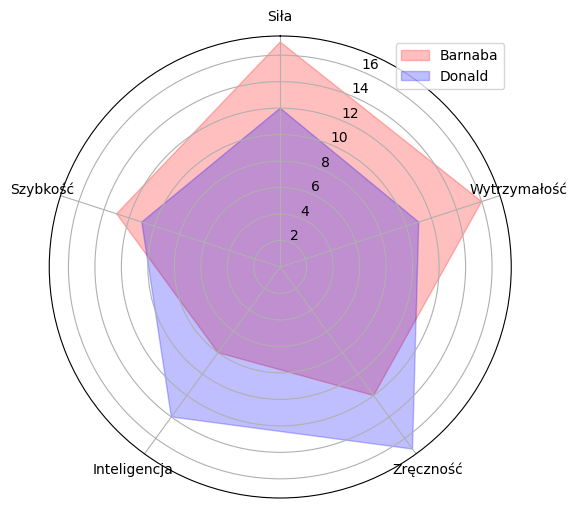

In [12]:
# przykład wyświetlenia wielu serii na jednym wykresie
# dane
etykiety = ['Siła', 'Wytrzymałość', 'Zręczność', 'Inteligencja', 'Szybkość']
dane = [[17, 16, 12, 8, 13], [12, 11, 17, 14, 11]]

# generowanie ilości osi i ich położenia na wykresie
angles = np.linspace(0, 2 * np.pi, len(etykiety), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# wypełnienie obszarów
ax.fill(angles, dane[0], color='red', alpha=0.25, label='Barnaba')
ax.fill(angles, dane[1], color='blue', alpha=0.25, label='Donald')
# rysowanie linii na krawędziach obszaru - opcjonalne
# ax.plot(angles, dane, color='red', linewidth=1)

# ustawienie osi, tak aby rozpoczynały się od "godziny 12"
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# rysowanie linii osi dla
ax.set_thetagrids(np.degrees(angles), etykiety)
plt.legend();

## 2. Wykresy animowane

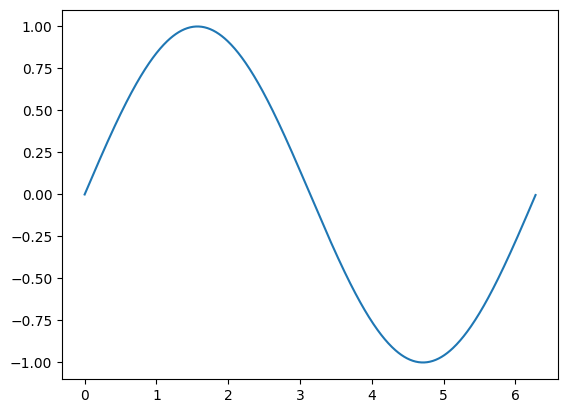

In [13]:
# przykład animacji wykresu pochodzący z oficjalnej dokumentacji
# https://matplotlib.org/stable/gallery/animation/simple_anim.html#sphx-glr-gallery-animation-simple-anim-py
# aby animacja zadziałała, skrypt należy uruchomić z poziomu terminala (możesz uruchomić sesję terminala również poprzez Jupyter Lab)
# gotowy skrypt znajduje się w pliku test.py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

## 3. Adnotacje na wykresach

Oprócz surowych danych oraz podstawowych informacji na obszarze wykresów takich jak legenda czy etykiety osi możemy również "dekorować" wykres dodatkowymi informacjami takimi jak linie, symbole czy tekst umieszczane we wskazanych miejscach wykresu. Umiejscowienie tych elementów zazwyczaj odbywa się w odniesieniu do wartości na obu osiach, ale może być również podane jako wartość bezwzględna, np. w postaci współrzędnych wyrażonych w pikselach.

**Przykład 1 - linia pionowa**

Linia pionowa we wskazanym przez wartość na osi `x` miejscu.
Dokumentacja:
* https://matplotlib.org/3.10.1/api/_as_gen/matplotlib.pyplot.axline.html
* https://matplotlib.org/3.10.1/api/_as_gen/matplotlib.pyplot.axvline.html
* https://matplotlib.org/3.10.1/api/_as_gen/matplotlib.pyplot.axhline.html

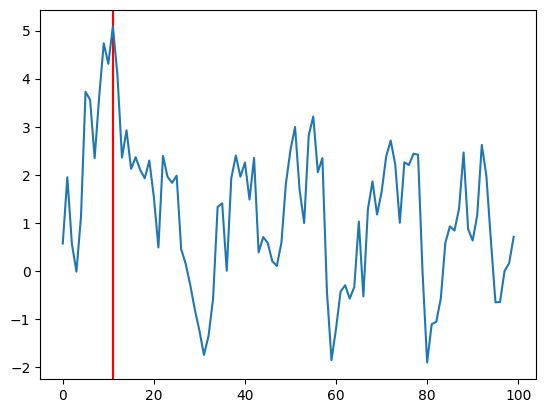

In [225]:
# dane do wykresu
values = np.random.randn(100).cumsum()

# linia pionowa o "nieskończonej" długości
plt.axvline(np.argmax(values), color='r')
plt.plot(values);

**Przykład 2 - obiekty graficzne**

Zazwyczaj będą to symbole w postaci strzałek, prostych obiektów geometrycznych, tekstu.

> Dokumentacja:
> * https://matplotlib.org/3.10.1/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py
> * https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html
> * https://matplotlib.org/stable/gallery/index.html#text-labels-and-annotations

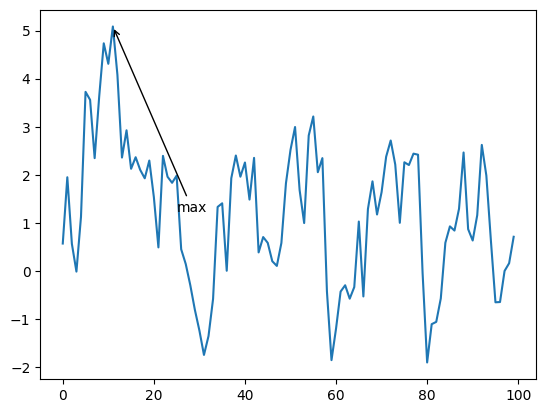

In [226]:
# zapisujemy obiekt wykresu oraz osi do zmiennych
fig, ax = plt.subplots()

# parametr xy określa współrzędne x1, y1 - tutaj punkt w który wskzuje grot strzałki
# parametr xytext to współrzędne x2, y2 - początek strzałki oraz położenie tekstu (opcjonalny)
# parametry xycoords oraz textcoords to informacja o tym, że współrzędne będą przekazywane jako wartości
# z danych (czyli 10 oznacza punkt, który reprezentuje wartość 10 na osi, a nie 10-ty element)
ax.annotate("max",
            xy=(np.argmax(values), np.max(values)), xycoords='data',
            xytext=(len(values)/4, np.mean(values)), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            );
plt.plot(values);

**Przykład 3 - wypełnienie obszaru**

> Dokumentacja:
> * https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html#matplotlib.pyplot.fill_between

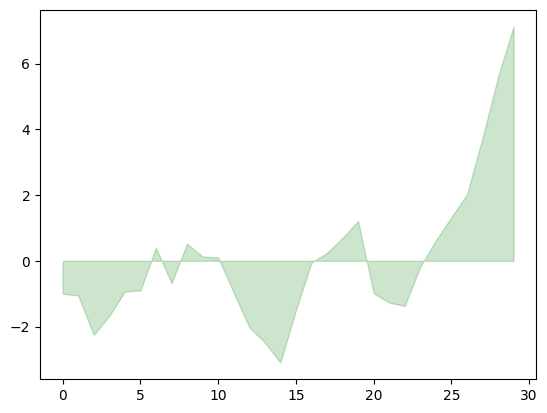

In [21]:
# x oraz y1 zawierają koordynaty, które zostaną wypełnione wskazanym kolorem
# oba wektory muszą być równoliczne
# tutaj pobieramy pierwsze 30 wartości całego zbioru
plt.fill_between(
        x = list(range(30)),
        y1 = values[:30],
        color= "g",
        alpha= 0.2);

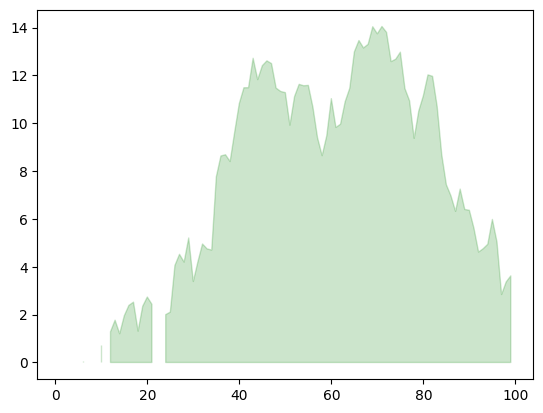

In [56]:
# tutaj kolorujemy dane dla całego wykresu, ale odfiltrowane (where) dla wartości
# z wektora, które spełniają dany warunek (tablica bool)
plt.fill_between(
        x = list(range(len(values))),
        y1 = values,
        where = (values > 0),
        color= "g",
        alpha= 0.2);

## 4. Formatowanie ramek biblioteki pandas (w Jupyter Notebook)
Oprócz możliwości wypisania ramki DataFrame w postaci dość przejrzyście sformatowanej ramki HTML możliwe jest określenie własnych styli oraz warunków formatowania takiego wyjścia.

> Dokumentacja:

> * https://pandas.pydata.org/docs/user_guide/style.html
> * https://www.analyticsvidhya.com/blog/2021/06/style-your-pandas-dataframe-and-make-it-stunning/
> * https://coderzcolumn.com/tutorials/python/simple-guide-to-style-display-of-pandas-dataframes

In [72]:
import pandas as pd

df = pd.read_csv('data/pkn.txt')
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d')

# mała transformacja pierwotnych danych, nazwy kolumn w postaci <NAZWA> powodowały
# niewłaściwe działanie przy opcjach związanych z formatowaniem
df.drop(columns=['<PER>', '<TIME>', '<OPENINT>'], inplace=True)
df.columns = [column.replace('<','').replace('>','') for column in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TICKER  5583 non-null   object        
 1   DATE    5583 non-null   datetime64[ns]
 2   OPEN    5583 non-null   float64       
 3   HIGH    5583 non-null   float64       
 4   LOW     5583 non-null   float64       
 5   CLOSE   5583 non-null   float64       
 6   VOL     5583 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 305.4+ KB


In [73]:
# dla potrzeb przykładu wybierzemy tylko niewielki wycinek danych
df10 = df[:10]
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TICKER  10 non-null     object        
 1   DATE    10 non-null     datetime64[ns]
 2   OPEN    10 non-null     float64       
 3   HIGH    10 non-null     float64       
 4   LOW     10 non-null     float64       
 5   CLOSE   10 non-null     float64       
 6   VOL     10 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 692.0+ bytes


In [227]:
df10

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26,15.268,15.403,14.715,15.194,15857000
1,PKN,1999-11-29,15.124,15.194,14.852,14.923,5499196
2,PKN,1999-11-30,15.060,15.330,15.060,15.194,3287087
3,PKN,1999-12-01,15.330,15.674,15.194,15.674,3077747
4,PKN,1999-12-02,15.818,16.297,15.745,15.954,3304014
5,PKN,1999-12-03,15.954,16.225,15.818,16.159,2357914
6,PKN,1999-12-06,16.297,16.847,16.297,16.776,3005048
7,PKN,1999-12-07,16.711,16.776,16.503,16.503,2426246
8,PKN,1999-12-08,16.503,16.911,16.503,16.639,3807338
9,PKN,1999-12-09,16.639,16.639,16.225,16.503,2513405


In [75]:
# przykład formatowania wyświetlanych wartości (tylko na wyjściu)
df10.style.format(precision=2
                  ,thousands=" "
                  ,formatter={'OPEN': lambda x: f"{x:,.2f} zł"})

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.27 zł,15.40,14.71,15.19,15 857 000
1,PKN,1999-11-29 00:00:00,15.12 zł,15.19,14.85,14.92,5 499 196
2,PKN,1999-11-30 00:00:00,15.06 zł,15.33,15.06,15.19,3 287 087
3,PKN,1999-12-01 00:00:00,15.33 zł,15.67,15.19,15.67,3 077 747
4,PKN,1999-12-02 00:00:00,15.82 zł,16.30,15.74,15.95,3 304 014
5,PKN,1999-12-03 00:00:00,15.95 zł,16.23,15.82,16.16,2 357 914
6,PKN,1999-12-06 00:00:00,16.30 zł,16.85,16.30,16.78,3 005 048
7,PKN,1999-12-07 00:00:00,16.71 zł,16.78,16.50,16.50,2 426 246
8,PKN,1999-12-08 00:00:00,16.50 zł,16.91,16.50,16.64,3 807 338
9,PKN,1999-12-09 00:00:00,16.64 zł,16.64,16.23,16.50,2 513 405


In [60]:
# formatowanie wartości maksymalnych w kolumnach + poprzedni format
df10.style.highlight_max(color='green') \
    .format(precision=2
                  ,thousands=" "
                  ,formatter={'OPEN': lambda x: f"{x:,.2f} zł"})

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.27 zł,15.40,14.71,15.19,15 857 000
1,PKN,1999-11-29 00:00:00,15.12 zł,15.19,14.85,14.92,5 499 196
2,PKN,1999-11-30 00:00:00,15.06 zł,15.33,15.06,15.19,3 287 087
3,PKN,1999-12-01 00:00:00,15.33 zł,15.67,15.19,15.67,3 077 747
4,PKN,1999-12-02 00:00:00,15.82 zł,16.30,15.74,15.95,3 304 014
5,PKN,1999-12-03 00:00:00,15.95 zł,16.23,15.82,16.16,2 357 914
6,PKN,1999-12-06 00:00:00,16.30 zł,16.85,16.30,16.78,3 005 048
7,PKN,1999-12-07 00:00:00,16.71 zł,16.78,16.50,16.50,2 426 246
8,PKN,1999-12-08 00:00:00,16.50 zł,16.91,16.50,16.64,3 807 338
9,PKN,1999-12-09 00:00:00,16.64 zł,16.64,16.23,16.50,2 513 405


In [76]:
# prawdopodobnie nie interesują nas wartości maksymalne w kolumnie z nazwą waloru oraz datą
# możemy przekazać informacje na temat kolumn (właściwie podzbioru w postaci wycinka), które powinny zostać poddane formatowaniu
# więcej o wykorzystaniu funkcji format(): https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.format.html
slice_ = ['OPEN','CLOSE','LOW','HIGH','VOL']
df10.style.highlight_max(color='green', subset=slice_) \
    .format(precision=2
                  ,thousands=" "
                  ,formatter=lambda x: f"{x:,.2f} zł"
                  ,subset=['OPEN','CLOSE','LOW','HIGH'])

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.27 zł,15.40 zł,14.71 zł,15.19 zł,15857000
1,PKN,1999-11-29 00:00:00,15.12 zł,15.19 zł,14.85 zł,14.92 zł,5499196
2,PKN,1999-11-30 00:00:00,15.06 zł,15.33 zł,15.06 zł,15.19 zł,3287087
3,PKN,1999-12-01 00:00:00,15.33 zł,15.67 zł,15.19 zł,15.67 zł,3077747
4,PKN,1999-12-02 00:00:00,15.82 zł,16.30 zł,15.74 zł,15.95 zł,3304014
5,PKN,1999-12-03 00:00:00,15.95 zł,16.23 zł,15.82 zł,16.16 zł,2357914
6,PKN,1999-12-06 00:00:00,16.30 zł,16.85 zł,16.30 zł,16.78 zł,3005048
7,PKN,1999-12-07 00:00:00,16.71 zł,16.78 zł,16.50 zł,16.50 zł,2426246
8,PKN,1999-12-08 00:00:00,16.50 zł,16.91 zł,16.50 zł,16.64 zł,3807338
9,PKN,1999-12-09 00:00:00,16.64 zł,16.64 zł,16.23 zł,16.50 zł,2513405


In [77]:
# listę wszystkich dostępnych map kolorów biblioteki matplotlib znajdziemy tu
# lista map kolorów: https://matplotlib.org/stable/users/explain/colors/colormaps.html
from matplotlib import colormaps
print(list(colormaps))

# a tu przykład (jak w excelu) zastosowania jednej z nich
df10.style.background_gradient(cmap='coolwarm')

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.268000,15.403000,14.715000,15.194000,15857000
1,PKN,1999-11-29 00:00:00,15.124000,15.194000,14.852000,14.923000,5499196
2,PKN,1999-11-30 00:00:00,15.060000,15.330000,15.060000,15.194000,3287087
3,PKN,1999-12-01 00:00:00,15.330000,15.674000,15.194000,15.674000,3077747
4,PKN,1999-12-02 00:00:00,15.818000,16.297000,15.745000,15.954000,3304014
5,PKN,1999-12-03 00:00:00,15.954000,16.225000,15.818000,16.159000,2357914
6,PKN,1999-12-06 00:00:00,16.297000,16.847000,16.297000,16.776000,3005048
7,PKN,1999-12-07 00:00:00,16.711000,16.776000,16.503000,16.503000,2426246
8,PKN,1999-12-08 00:00:00,16.503000,16.911000,16.503000,16.639000,3807338
9,PKN,1999-12-09 00:00:00,16.639000,16.639000,16.225000,16.503000,2513405


## Zadania

**Zadanie 1**

Bazując na powyższych przykładach wykresu radarowego napisz funkcję, która będzie w stanie wyświetlić podobny wykres dla danych ze zbioru FIFA22_official_data.csv (podfolder **data**). Założenia:

* funkcja przyjmuje jako wektor pandas DataFrame, w którym pierwsza kolumna to nazwa piłkarza a kolejne kolumny to dowolny podzbiór cech piłkarskich tego zawodnika (od Crossing do GKReflexes),
* funkcja i wykres powinny działać dla zmiennej liczby cech oraz dla zmiennej liczby piłkarzy,
* ustaw stały zakres wartości cech w przedziale [0, 100],
* etykiety osi na wykresie to etykiety kolumn poza nazwą piłkarza,
* każdy piłkarz reprezentowany jest przez inny kolor,
* legenda zawiera również nazwisko piłkarza.


**Zadanie 2**

Korzystając ze zbioru danych [pkn.txt](./data/pkn.txt), przygotuj skrypt, który będzie wyświetlał animację wykresu odzwierciedlającą cenę zamknięcia (kolumna `CLOSE`) tego waloru. Na osi y powinna znajdować się cena a na osi x kolejny odczyt tej ceny. Przy pierwszym wyświetleniu wykresu pobierz pierwsze 20 wartości, a następnie przy każdej animacji agreguj kolejny odczyt. W miarę możliwości ustaw takie parametry wykresu, aby linia wykresu nie znajdowała się bezpośrednio przy górnej lub prawej krawędzi płótna.
Aktualizuj również na osi x daty odczytu wartości waloru w trakcie postępu animacji.

**Zadanie 3**

Wykorzystując dane [pkn.txt](./data/pkn.txt) wyrysuj wykres liniowy dla ceny zamknięcia i dodaj do wykresu wskaźniki jak w przykładzie z adnotacjami (przykład 2), które wskażą wartość najmniejszą oraz największą.

**Zadanie 4**

Korzystając z danych [pkn.txt](./data/pkn.txt) pogrupuj dane po roku i miesiącu, znajdź wartość minimalną oraz maksymalną dla kolumny `CLOSE`, a następnie za pomocą przykładu formatowania danych z punktu 4 zaznacz wartość minimalną i maksymalną w tej kolumnie różnymi stylami (odpowiednio funkcje highlight_min oraz highlight_max).

Przykładowy wykres z zadania 1 może wyglądać tak:

![radar_plot_ex1.png](radar_plot_ex1.png)